In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Year 4/Thesis/Notebooks/')
!pwd

/content/gdrive/My Drive/Year 4/Thesis/Notebooks


In [ ]:
!ls

 absa_reviews.csv	    models			       results
 data			    PhoBERT_base_transformers	      'Source Code'
 full_dataset_reviews.csv   PhoBERT_base_transformers.tar.gz   VnCoreNLP-1.1.1.jar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("final-data/augmented_data.csv")
data.head()

,reviews,label
0,tại_sao ngân_hàng vpbank e đang liên_kết với m...,Negative
1,nạp tiền lỗi đợi ngày mới đc xong rút_tiền cũn...,Negative
2,quá tốt khong gì để chê,Positive
3,ok,Positive
4,lag quá,Negative


In [ ]:
data.shape

(75442, 2)

In [ ]:
data = data.drop_duplicates()
data.shape

(75441, 2)

In [ ]:
# Define list of bad_words that need to removed

bad_words = ['clm', 'dell', 'vc', 'cc', 'vcl', 'vl', 'lol', 'loz', 'l', 'mọe','đm', 'dm', 'zl', 'Dubadeomemay', 'qq', 'má', 'mẹ']

In [ ]:
data['tokenized_text'] = [str(word).split() for word in data['reviews']]

In [ ]:
# Define a word_list dictionary

replace_list = {
    'ô kêi': 'ok', 'okie': 'ok', 'o kê': 'ok', 'okey': 'ok', 'ôkê': 'ok', 'oki': 'ok', 'oke': 'ok', 'okay': 'ok', 'okê': 'ok',
    'tks': 'cảm ơn', 'thks': 'cảm ơn', 'thanks': 'cảm ơn', 'ths': 'cảm ơn', 'thank': 'cảm ơn',
    'kg': 'không', 'not': 'không', 'hk': 'không', 'k': 'không', 'kh': 'không', 'kô': 'không', 'hok': 'không', 'ko': 'không', 'khong': 'không', 'kp': 'không phải',
    'he he': 'tích cực', 'hehe': 'tích cực', 'hihi': 'tích cực', 'haha': 'tích cực', 'hjhj': 'tích cực', 'thick': 'tích cực',
    'lol': 'tiêu cực', 'cc': 'tiêu cực', 'huhu': 'tiêu cực', 'cute': 'dễ thương', 'éo':'không', 'méo':'không',

    'sz': 'size', 'wa': 'quá', 'wá': 'quá', 'qá': 'quá', 'lk' : 'liên kết',
    'đx': 'được', 'dk': 'được', 'dc': 'được', 'đk': 'được', 'đc': 'được', 'dx': 'được', 'ngta':'người ta',
    'vs': 'với', 'j': 'gì', '“': ' ', 'time': 'thời gian', 'm': 'mình', 'mik': 'mình', 'r': 'rồi', 'bjo': 'bao giờ', 'very': 'rất', 'cx' : 'cũng',
    'tk': 'tài khoản', 'mk': 'mật khẩu', 'CCCCD': 'căn cước công dân', 'CMND':'chứng minh nhân dân', 'chuyển tiền':'chuyển_tiền', 'Chuyển tiền': 'chuyển_tiền',

    'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth': 'chuẩn chính hãng', 'date': 'hạn sử dụng', 'hsd': 'hạn sử dụng',
    'store': 'cửa hàng', 'sop': 'cửa hàng', 'shopE': 'cửa hàng', 'shop': 'cửa hàng',
    'sp': 'sản phẩm', 'product': 'sản phẩm', 'hàg': 'hàng',
    'ship': 'giao hàng', 'delivery': 'giao hàng', 'síp': 'giao hàng', 'order': 'đặt hàng',

    'gud': 'tốt', 'wel done': 'tốt', 'gút': 'tốt', 'tot': 'tốt',
    'chất lg': 'chất lượng', 'chat': 'chất', 'excelent': 'hoàn hảo', 'bt': 'bình thường',
    'sad': 'tệ', 'por': 'tệ', 'poor': 'tệ', 'bad': 'tệ',
    'beautiful': 'đẹp tuyệt vời', 'dep': 'đẹp',
    'xau': 'xấu', 'sấu': 'xấu', 'dell': 'không', 'đell':'không', 'j':'gì', 'đou':'đâu', 'dou':'đâu', 'ngu':'tệ',

    'thik': 'thích', 'iu': 'yêu', 'fake': 'giả mạo',
    'dt': 'điện thoại', 'fb': 'facebook', 'face': 'facebook', 'ks': 'khách sạn', 'nv': 'nhân viên',
    'nt': 'nhắn tin', 'ib': 'nhắn tin', 'tl': 'trả lời', 'trl': 'trả lời', 'rep': 'trả lời',
    'fback': 'feedback', 'fedback': 'feedback',
    'sd': 'sử dụng', 'sài': 'xài', 'như cức':'tệ', 'ch':'chưa', 'xog':'xong',

    '^_^': 'tích cực', ':)': 'tích cực', ':(': 'tiêu cực',
    '❤️': 'tích cực', '👍': 'tích cực', '🎉': 'tích cực', '😀': 'tích cực', '😍': 'tích cực', '😂': 'tích cực', '🤗': 'tích cực', '😙': 'tích cực', '🙂': 'tích cực',
    '😔': 'tiêu cực', '😓': 'tiêu cực',
    '⭐': 'star', '*': 'star', '🌟': 'star', '...':'tiêu cực'
}

In [ ]:
# Function to replace words using the replace_list dictionary and filter out bad words

def normalize_acronyms(word_list):
    normalized_words = []
    for word in word_list:
        # Replace word if it exists in the replace_list dictionary
        replaced_word = replace_list.get(word, word)
        # Check if the replaced word is not a bad word
        if replaced_word.lower() not in bad_words:
            normalized_words.append(replaced_word)
    return normalized_words

data['tokenized'] = data['tokenized_text'].apply(normalize_acronyms)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.tokenized)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 16203


In [ ]:
tokenizer.word_index

{'không': 1,
 'ok': 2,
 'app': 3,
 'tốt': 4,
 'duoc': 5,
 'được': 6,
 'cho': 7,
 'tien': 8,
 'ma': 9,
 'sao': 10,
 'tiền': 11,
 'rat': 12,
 'co': 13,
 'qua': 14,
 'rất': 15,
 'có': 16,
 'dung': 17,
 'mà': 18,
 'thi': 19,
 'thì': 20,
 'khi': 21,
 'vi': 22,
 'la': 23,
 'là': 24,
 'quá': 25,
 'ngân_hàng': 26,
 'ngan_hang': 27,
 'liên_kết': 28,
 'loi': 29,
 'lien_ket': 30,
 'hay': 31,
 '1': 32,
 'lai': 33,
 'xong': 34,
 'vao': 35,
 'toi': 36,
 'lại': 37,
 'dùng': 38,
 'moi': 39,
 'lỗi': 40,
 'trong': 41,
 'ung_dung': 42,
 'vào': 43,
 'ví': 44,
 'ra': 45,
 'ứng_dụng': 46,
 'minh': 47,
 'tai': 48,
 'nhieu': 49,
 'va': 50,
 'de': 51,
 'nhu': 52,
 'nap': 53,
 'nhiều': 54,
 'vay': 55,
 'roi': 56,
 'thanh_toán': 57,
 'thanh_toan': 58,
 'nạp': 59,
 'như': 60,
 'và': 61,
 'mình': 62,
 'rồi': 63,
 'the': 64,
 'lam': 65,
 'bi': 66,
 'vnpay': 67,
 'cung': 68,
 'voi': 69,
 'tôi': 70,
 'cai': 71,
 'te': 72,
 'tệ': 73,
 'nay': 74,
 'gi': 75,
 'bị': 76,
 'bao': 77,
 've': 78,
 'nguoi': 79,
 'nhung': 80,


In [ ]:
data['label'].value_counts()

label
Negative    44706
Positive    16792
Neutral     13943
Name: count, dtype: int64

In [ ]:
# Implement topic modeling using LDA

import gensim.corpora as corpora

from gensim.models import LdaMulticore
from pprint import pprint

# Create Dictionary
id2word = corpora.Dictionary(data['tokenized'])

data_words = data['tokenized']

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
num_topics = 10
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.056*"không" + 0.047*"thi" + 0.044*"ve" + 0.039*"cho" + 0.038*"chua" + '
  '0.032*"qua" + 0.031*"te" + 0.027*"phai" + 0.025*"sao" + 0.024*"nua"'),
 (1,
  '0.139*"them" + 0.130*"bat" + 0.095*"len" + 0.072*"se" + 0.039*"kem" + '
  '0.025*"cang" + 0.024*"không" + 0.023*"nghi" + 0.017*"qua" + 0.016*"muot"'),
 (2,
  '0.142*"voi" + 0.105*"den" + 0.052*"phan" + 0.038*"a" + 0.037*"de" + '
  '0.035*"gan" + 0.031*"tang" + 0.023*"không" + 0.017*"lo" + 0.016*"cap"'),
 (3,
  '0.060*"không" + 0.033*"tien" + 0.032*"ma" + 0.023*"duoc" + 0.022*"co" + '
  '0.017*"app" + 0.017*"dung" + 0.016*"loi" + 0.015*"la" + 0.014*"lien_ket"'),
 (4,
  '0.060*"cao" + 0.060*"dat" + 0.057*"hoai" + 0.055*"hoan" + 0.053*"phi" + '
  '0.040*"sang" + 0.040*"nam" + 0.031*"tra" + 0.029*"không" + 0.028*"d"'),
 (5,
  '0.070*"khac" + 0.054*"tren" + 0.046*"bang" + 0.038*"không" + 0.035*"chu" + '
  '0.031*"ben" + 0.030*"thang" + 0.027*"vay" + 0.025*"cho" + 0.021*"thuong"'),
 (6,
  '0.111*"viettel" + 0.080*"vnpay" + 0.069*"

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokenized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.506770131357355

Coherence Score:  0.5123626797965889


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.008843  0.014407       1        1  22.305745
7     -0.052068 -0.059046       2        1  16.261340
9     -0.011605  0.032285       3        1   9.103129
1      0.004912  0.005583       4        1   8.550675
5      0.012906 -0.026865       5        1   8.547571
8     -0.064183 -0.012972       6        1   8.175858
4      0.045042 -0.054204       7        1   7.792425
3     -0.012220  0.119626       8        1   7.119717
0     -0.059715 -0.015828       9        1   6.352604
2      0.128089 -0.002984      10        1   5.790936, topic_info=           Term         Freq        Total Category  logprob  loglift
6          tiền  1768.000000  1768.000000  Default  30.0000  30.0000
63     liên_kết  1104.000000  1104.000000  Default  29.0000  29.0000
905      airpay   424.000000   424.000000  Default  28.0000  28.0000
34         nhập   326.000000   326.000000  Default  27.0000  27.0000
9     tài_khoản   693.000000   693.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
49   điện_thoại    13.917440   276.112770  Topic10  -5.0882  -0.1388
132      hỗ_trợ    12.985454   208.089366  Topic10  -5.1576   0.0747
238     viettel    12.325393   165.881226  Topic10  -5.2097   0.2493
52    thông_báo    12.066334   147.412252  Topic10  -5.2310   0.3461
31         chán    11.773337   155.204706  Topic10  -5.2556   0.2700

[765 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
84        1  0.325717      100k
84        2  0.025055      100k
84        3  0.025055      100k
84        4  0.125276      100k
84        5  0.025055      100k
...     ...       ...       ...
15        6  0.095227  ứng_dụng
15        7  0.148554  ứng_dụng
15        8  0.024759  ứng_dụng
15        9  0.057136  ứng_dụng
15       10  0.013332  ứng_dụng

[1948 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 10, 2, 6, 9, 5, 4, 1, 3])

In [ ]:
aspects = {
    'convenience': ['tiện_lợi', 'hữu_ích', 'hữu ích', 'hữu dụng' ,'ok', 'tốt', 'hiệu quả', 'thuận tiện', 'bất_tiện', 'kém', 'phức_tạp', 'tệ', 'tiêu cực', 'hai_long', 'tuyệt_vời', 'uy_tín', 'ức_chế',
                    'an_toàn', 'hài_lòng', 'ổn_định', 'uy_tín', 'tiện'],
    'payment_integration': ['thanh_toán', 'tiền', 'tien','tiên', 'chuyển tiền', 'rút_tiền', 'transfer', 'money', 'tk', 'tài_khoản', 'tài khoản', 'bank', 'trả', 'tốn_phí',
                            'tai khoan', 'nạp', 'ngân_hàng', 'mua', 'thanh toan', 'phí', 'giao_dịch', 'vay', 'tièn', 'hoàn', 'chuyển khoản', 'chuyển', 'trừ', 'thẻ', 'rút',
                            'hóa_đơn', 'hạn_mức', 'chi_phí',],
    'accessibility': ['đăng_nhập', 'đăng_ký', 'login', 'sign_in', 'đăng_kí', 'bị out', 'mật khẩu', 'tải', 'treo', 'mk', 'mật_khẩu', 'out', 'cài_đặt', 'truy_cập', 'văng', 'vào'],
    'security_privacy': ['bảo_mật', 'bảo mật', 'checkout', 'an toàn', 'virus', 'virut', 'độc hại', 'mật khẩu', 'spam', 'thông báo', 'lộ', 'thông_tin', ],
    'customer_support': ['hỗ_trợ', 'hỗ trợ', 'customer_support', 'liên_hệ', 'tổng_đài', 'nhắc nợ', 'tư vấn', 'trợ giúp', 'nhân viên', 'khiếu_nại', 'phản_ánh', 'giải_quyết', 'gọi', 'cskh'],
    'technical_issues': ['lỗi', 'otp', 'mã', 'error', 'bug', 'lag', 'giật', 'chậm' ,'sđt', 'sdt', 'liên_kết', 'link', 'connect', 'lien', 'ket', 'chụp', 'xác_thực',
                         'đợi hoài', 'load', 'mờ', 'xác thực', 'bảo trì', 'sập', 'treo', 'đơ', 'lác', 'nhận_diện', 'khuôn_mặt', 'định_danh', 'cccd', 'out'],
    'updates': ['cập_nhật', 'update', 'refresh', 'nâng_cấp', 'bảo_trì'],
    'fraud': ['lừa_đảo', 'scam', 'fraud', 'lừa', 'bịp', 'lừa_bịp', 'lùa'],
    'promotion': ['ưu_đãi', 'chương_trình', 'chương trình', 'khuyến_mãi', 'khuyến mãi', 'sự_kiện', 'lì_xì', 'event', 'khuyến_mại'],
    'functionality': ['tính_năng', 'chức_năng', 'game', 'trò chơi', 'sự_kiện', 'than tai', 'dịch_vụ', 'định vị', 'giao diện', 'thần tài', 'phim', 'vé'],
}

In [ ]:
# Initialize aspect columns in the data DataFrame
for aspect in aspects:
    data[aspect] = 0

# Function to label the presence of aspect terms in the text
def label_aspects(row, aspect_terms, aspect_name):
    for term in aspect_terms:
        if term in row['tokenized']:
            row[aspect_name] = 1
            break
    return row

# Apply the function to label each row with the corresponding aspects
for aspect, terms in aspects.items():
    data = data.apply(lambda row: label_aspects(row, terms, aspect), axis=1)

In [ ]:
data.head()

,reviews,label,tokenized_text,tokenized,convenience,payment_integration,accessibility,security_privacy,customer_support,technical_issues,updates,fraud,promotion,functionality
0,tại_sao ngân_hàng vpbank e đang liên_kết với m...,Negative,"[tại_sao, ngân_hàng, vpbank, e, đang, liên_kết...","[tại_sao, ngân_hàng, vpbank, e, đang, liên_kết...",0,1,0,0,0,1,0,0,0,0
1,nạp tiền lỗi đợi ngày mới đc xong rút_tiền cũn...,Negative,"[nạp, tiền, lỗi, đợi, ngày, mới, đc, xong, rút...","[nạp, tiền, lỗi, đợi, ngày, mới, được, xong, r...",0,1,0,0,0,1,0,0,0,0
2,quá tốt khong gì để chê,Positive,"[quá, tốt, khong, gì, để, chê]","[quá, tốt, không, gì, để, chê]",1,0,0,0,0,0,0,0,0,0
3,ok,Positive,[ok],[ok],1,0,0,0,0,0,0,0,0,0
4,lag quá,Negative,"[lag, quá]","[lag, quá]",0,0,0,0,0,1,0,0,0,0


In [ ]:
data.shape

(75441, 14)

In [ ]:
data.label.value_counts()

label
Negative    44706
Positive    16792
Neutral     13943
Name: count, dtype: int64

In [ ]:
# Identify aspect columns
aspect_columns = list(aspects.keys())

# Filter rows where all aspect columns are equal to 0
filtered_data = data[~(data[aspect_columns] == 0).all(axis=1)]

filtered_data.shape

(49305, 14)

In [ ]:
filtered_data = filtered_data.drop(columns = ['tokenized', 'tokenized_text'])
filtered_data.head()

,reviews,label,convenience,payment_integration,accessibility,security_privacy,customer_support,technical_issues,updates,fraud,promotion,functionality
0,tại_sao ngân_hàng vpbank e đang liên_kết với m...,Negative,0,1,0,0,0,1,0,0,0,0
1,nạp tiền lỗi đợi ngày mới đc xong rút_tiền cũn...,Negative,0,1,0,0,0,1,0,0,0,0
2,quá tốt khong gì để chê,Positive,1,0,0,0,0,0,0,0,0,0
3,ok,Positive,1,0,0,0,0,0,0,0,0,0
4,lag quá,Negative,0,0,0,0,0,1,0,0,0,0


In [ ]:
filtered_data = filtered_data.drop_duplicates()
filtered_data.shape

(49305, 12)

In [ ]:
filtered_data.to_csv("final-data/aspect-extraction.csv", index=False)

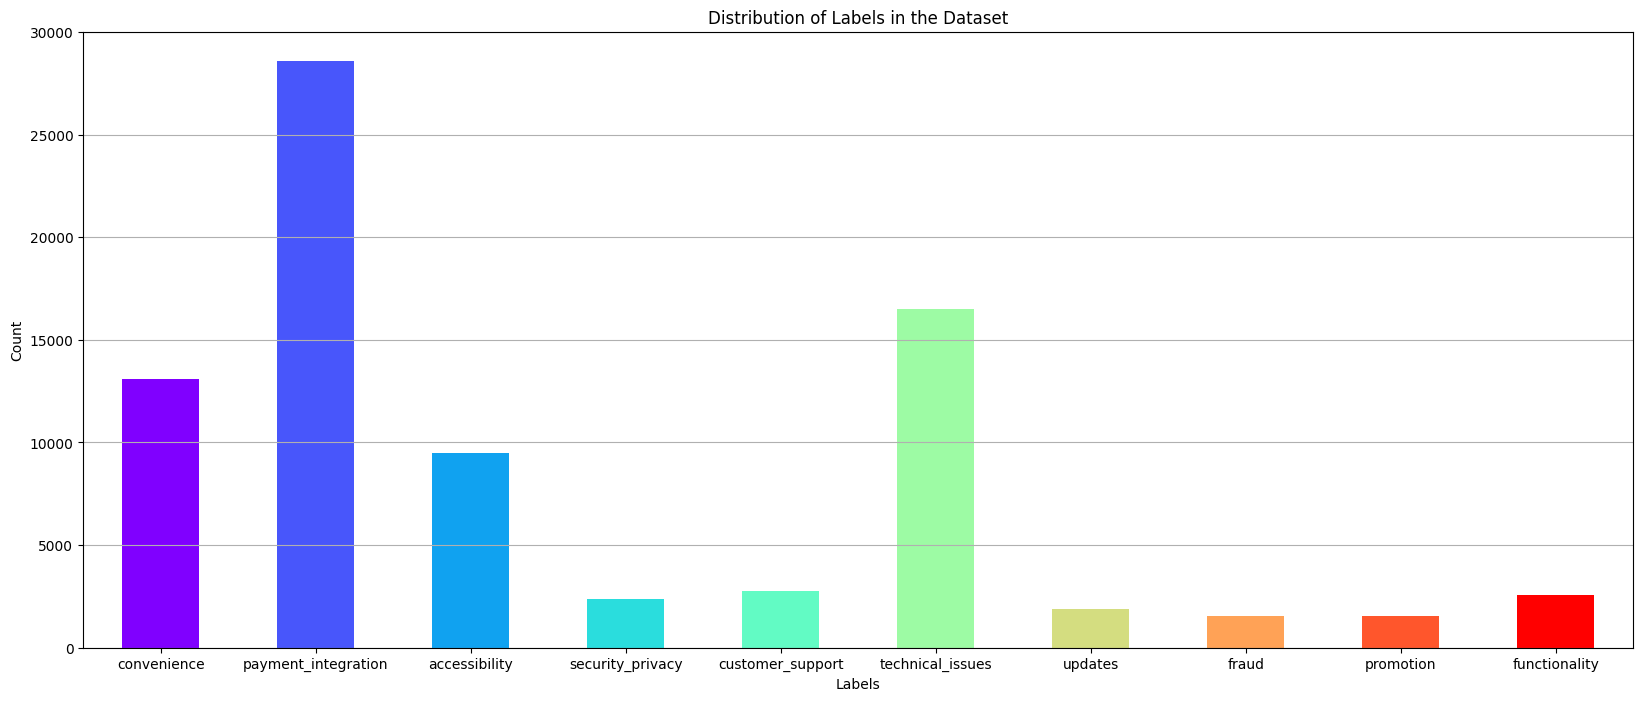

In [ ]:
# Calculate the distribution of labels
label_distribution = filtered_data.drop(columns=['reviews', 'label', 'tokenized_text', 'tokenized']).sum()

# Create a color map with distinct colors for each label
num_labels = len(label_distribution)
colors = plt.cm.rainbow(np.linspace(0, 1, num_labels))

# Plotting the distribution with unique colors
plt.figure(figsize=(20, 8))
label_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Non-label data

# Filter rows where all aspect columns are equal to 0
non_label = data[(data[aspect_columns] == 0).all(axis=1)]
non_label.shape

(26497, 14)